# QUESTIONS TO ANALYZE 📝

1)What are the different property types in the dataset?

2)Which neighborhood group has the highest number of listings?

3)Which neighborhood groups have the highest average prices for Airbnb listings?

4)Is there a relationship between the construction year of property and price?

5)Who are the top 10 hosts by calculated host listing count?

6)Are hosts with verified identities more likely to receive positive reviews?

7)Is there a correlation between the price of a listing and its service fee?

8)What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

9)Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns
pd.set_option('display.max_columns', None)

# Step 2: Load Dataset
file_path = "C:\\Users\\Aditya\\OneDrive\\Desktop\\1730285881-Airbnb_Open_Data.xlsx"   # ← make sure the file is in the same directory
df = pd.read_excel(file_path)

# Preview the dataset
print("🔸 Dataset Shape:", df.shape)
df.head()


🔸 Dataset Shape: (102599, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
# Step 3: Basic Info about Dataset
print("\n📌 Dataset Info:")
df.info()




📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 

In [4]:
# Step 4: Check for Missing Values
print("\n📌 Missing Values per Column:")
print(df.isnull().sum())



📌 Missing Values per Column:
id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365           

In [5]:
# Step 5: Descriptive Statistics (numerical columns)
print("\n📊 Descriptive Statistics:")
print(df.describe())


📊 Descriptive Statistics:
                 id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   

       instant_bookable  Construction year          price    service fee  \
count     102494.000000      102385.000000  102352.000000  102326.000000   
mean           0.497785        2012.487464     625.293536     125.026924   
min            0.000000        2003.000000      50.000000      10.000000   
25%            0.000000        2007.000000     340.000000      68

In [6]:
# Step 6: Check column names for typos or formatting issues
print("\n📌 Column Names:")
print(df.columns.tolist())


📌 Column Names:
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


In [7]:
# Step 7: Remove Duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\n🧽 Removed {before - after} duplicate rows.")


🧽 Removed 541 duplicate rows.


In [12]:
# Step 8: Handle Missing Values
# Example: Fill missing prices with median
if 'price' in df.columns:
    df['price'].fillna(df['price'].median(), inplace=True)

# Fill missing review scores with mean if exists
review_cols = [col for col in df.columns if 'review' in col.lower() or 'rating' in col.lower()]
for col in review_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

In [11]:
# Step 9: Standardize Text Columns (strip spaces, lowercase)
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Example: clean neighborhood names if exists
if 'neighbourhood' in df.columns:
    df['neighbourhood'] = df['neighbourhood'].astype(str).str.strip().str.title()

print("\n✅ Basic Cleaning Complete.")


✅ Basic Cleaning Complete.


In [13]:
# Step 13: Check Final Cleaned Dataset
print("\n✅ Final Dataset Overview:")
print(df.info())

print("\n📊 Missing Values After Cleaning:")
print(df.isnull().sum())

# Step 14: Save Cleaned Dataset (Optional)
df.to_csv("Cleaned_Airbnb_Data.csv", index=False)
print("\n💾 Cleaned dataset saved as 'Cleaned_Airbnb_Data.csv'")



✅ Final Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   name                            101788 non-null  object        
 2   host_id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host_name                       101652 non-null  object        
 5   neighbourhood_group             102029 non-null  object        
 6   neighbourhood                   102058 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country_code                    10

# Exploratory Data Analysis(EDA)

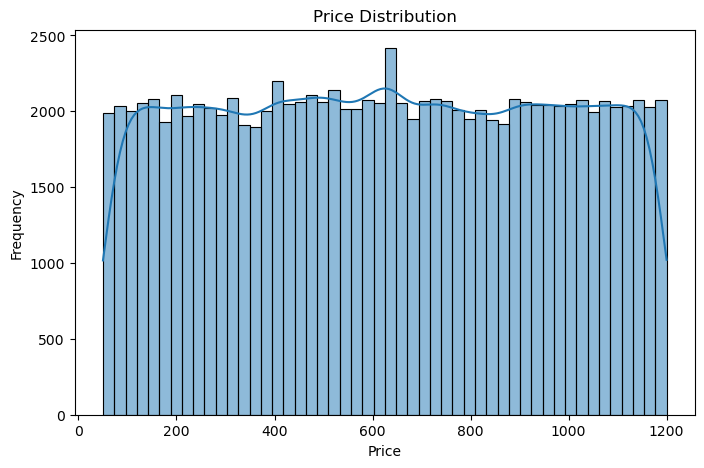


💰 Price Statistics:
count    102058.000000
mean        625.354720
std         331.271047
min          50.000000
25%         341.000000
50%         625.000000
75%         912.000000
max        1200.000000
Name: price, dtype: float64


In [15]:
if 'price' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['price'], bins=50, kde=True)
    plt.title('Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    print("\n💰 Price Statistics:")
    print(df['price'].describe())


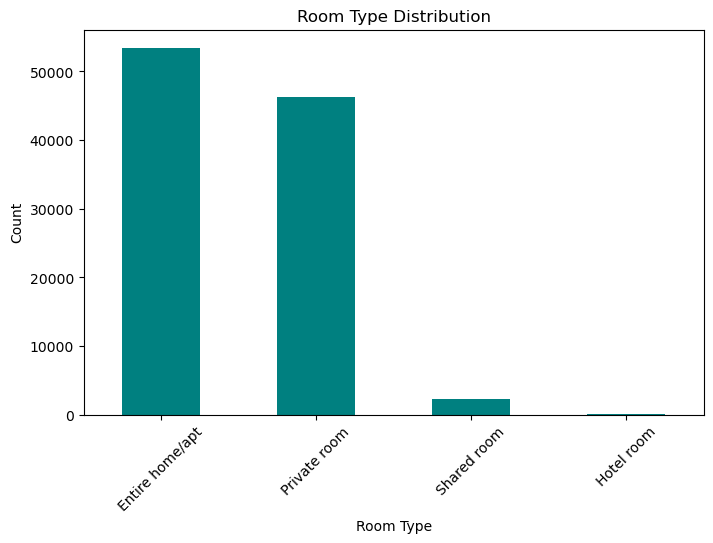

In [16]:
room_col = [c for c in df.columns if 'room' in c.lower() or 'property' in c.lower()]
if room_col:
    room_col = room_col[0]
    plt.figure(figsize=(8,5))
    df[room_col].value_counts().plot(kind='bar', color='teal')
    plt.title('Room Type Distribution')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


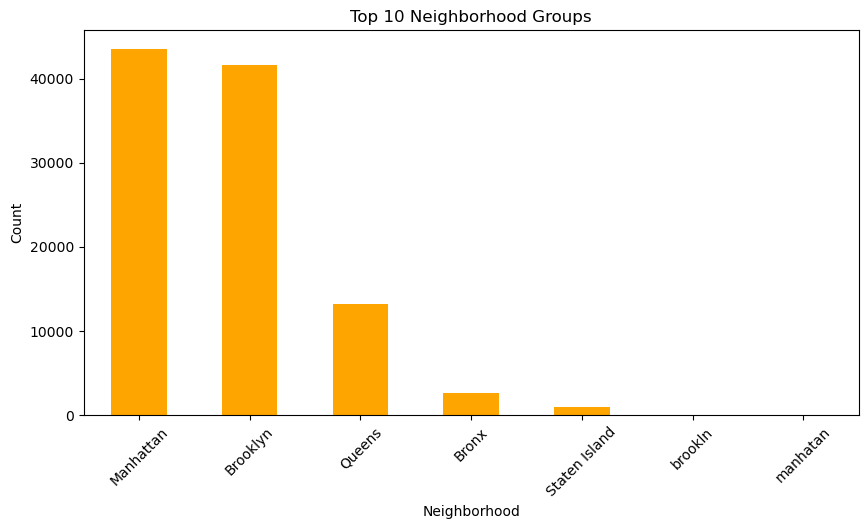

In [17]:
neigh_col = [c for c in df.columns if 'neighbourhood' in c.lower() or 'neighborhood' in c.lower()]
if neigh_col:
    neigh_col = neigh_col[0]
    plt.figure(figsize=(10,5))
    df[neigh_col].value_counts().head(10).plot(kind='bar', color='orange')
    plt.title('Top 10 Neighborhood Groups')
    plt.xlabel('Neighborhood')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


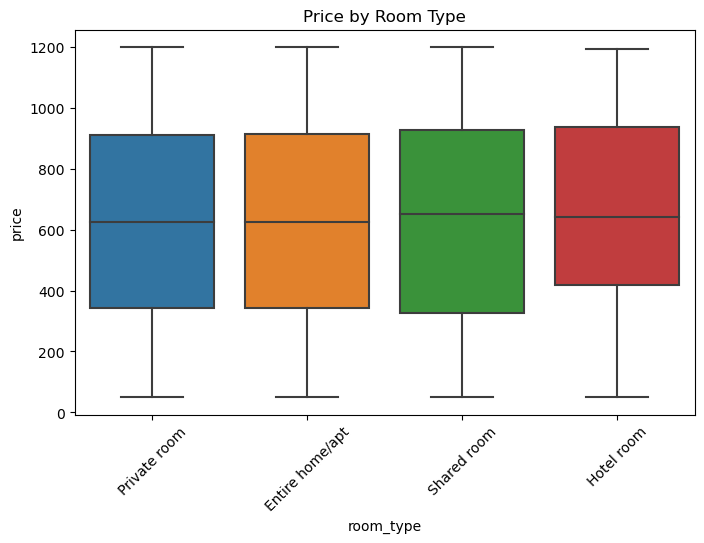

In [18]:
if 'price' in df.columns and room_col:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[room_col], y=df['price'])
    plt.title('Price by Room Type')
    plt.xticks(rotation=45)
    plt.show()


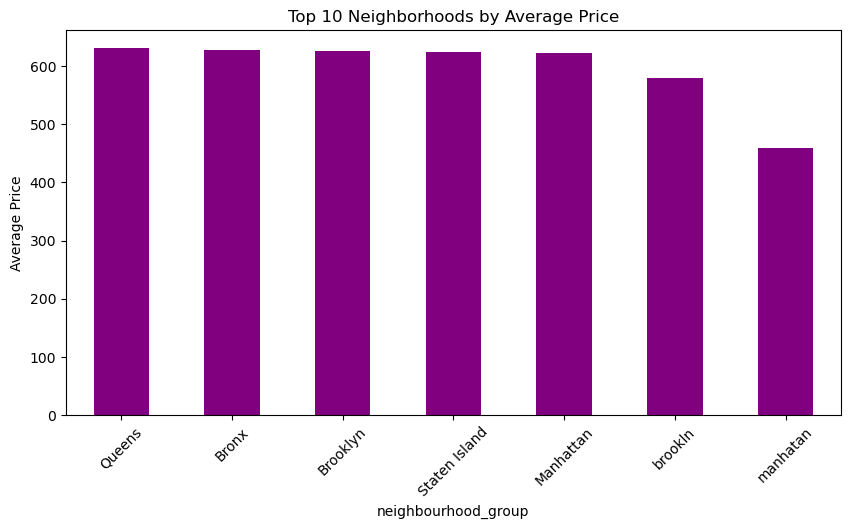

In [19]:
if 'price' in df.columns and neigh_col:
    avg_price_by_neigh = df.groupby(neigh_col)['price'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    avg_price_by_neigh.plot(kind='bar', color='purple')
    plt.title('Top 10 Neighborhoods by Average Price')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.show()


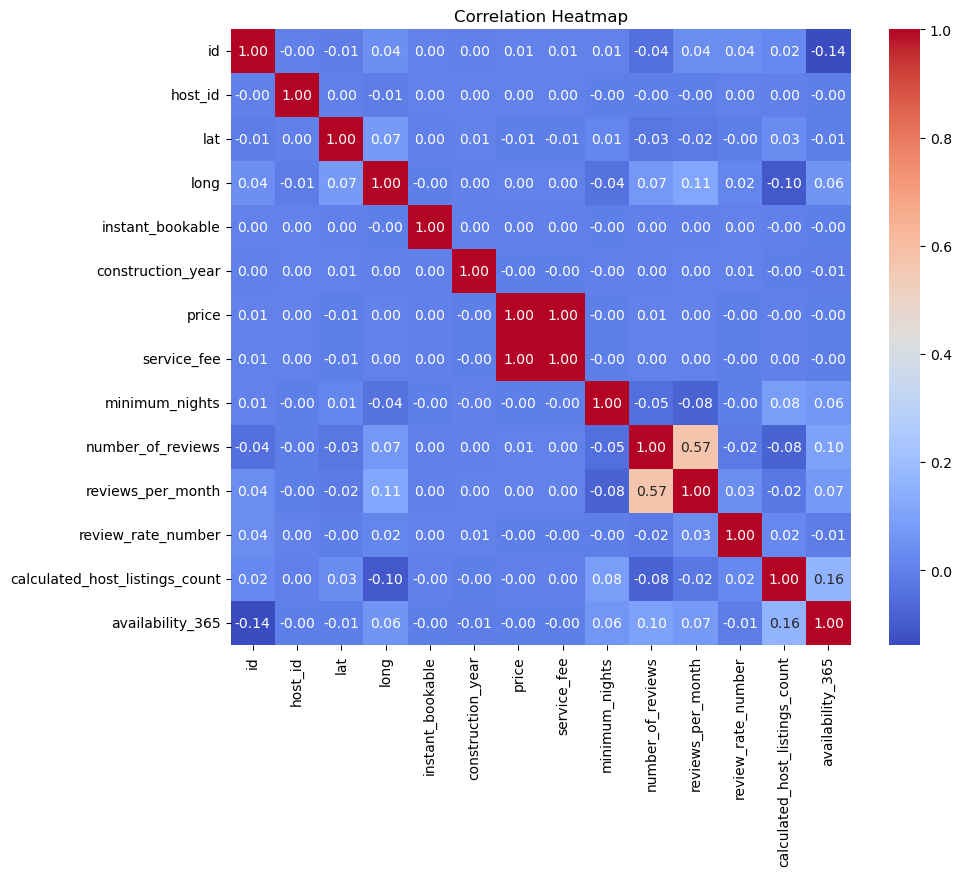

In [20]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


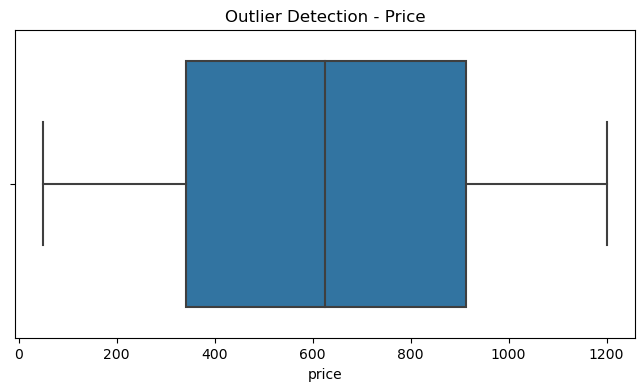


🚨 Number of Outliers in Price: 0


In [21]:
if 'price' in df.columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df['price'])
    plt.title('Outlier Detection - Price')
    plt.show()

    q1 = df['price'].quantile(0.25)
    q3 = df['price'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
    print(f"\n🚨 Number of Outliers in Price: {outliers.shape[0]}")


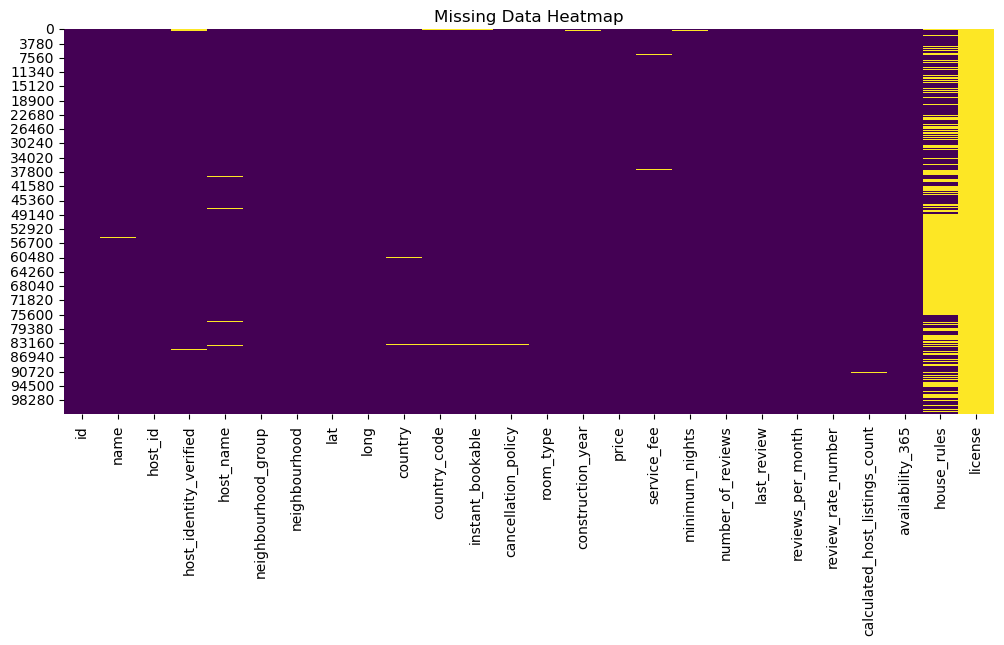

In [22]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


# Solutions to the Questions

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ✅ Step 1: Load the Dataset
file_path = "C:\\Users\\Aditya\\OneDrive\\Desktop\\1730285881-Airbnb_Open_Data.xlsx"   # make sure this file is in the same directory
df = pd.read_excel(file_path, sheet_name=0)   # use first sheet

print("✅ Dataset loaded")
print(f"Rows: {len(df)}, Columns: {len(df.columns)}")
print("Columns:", df.columns.tolist())

# ---------------------------------------------------------
# Helper function to detect best column match by keywords
# ---------------------------------------------------------
def best_match(columns, keywords):
    """Return first column name containing any keyword."""
    columns_lower = [c.lower() for c in columns]
    for kw in keywords:
        for i, col in enumerate(columns_lower):
            if kw in col:
                return columns[i]
    return None


✅ Dataset loaded
Rows: 102599, Columns: 26
Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


Q1: What are the different property types in the dataset?


Q1️⃣ Room / Property Types:
room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


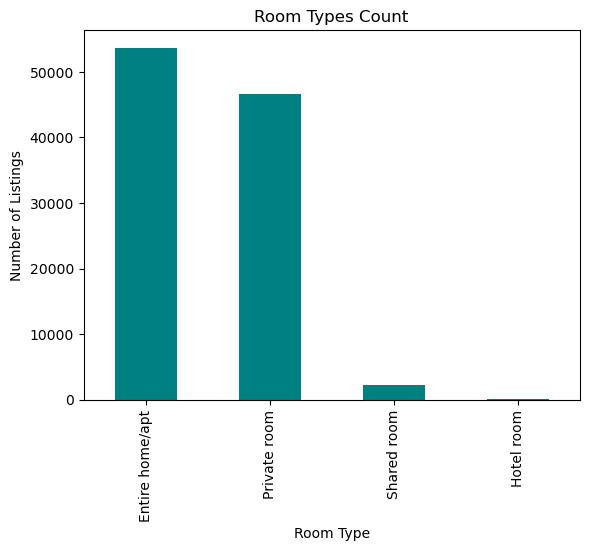

In [27]:
room_col = best_match(df.columns, ["room type", "room_type", "property_type", "room"])
if room_col:
    room_counts = df[room_col].value_counts()
    print("\nQ1️⃣ Room / Property Types:")
    print(room_counts)

    room_counts.plot(kind='bar', color='teal', title='Room Types Count')
    plt.xlabel('Room Type')
    plt.ylabel('Number of Listings')
    plt.show()


Q2: Which neighborhood group has the highest number of listings?


Q2️⃣ Top Neighborhood Groups by Listings:
neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64


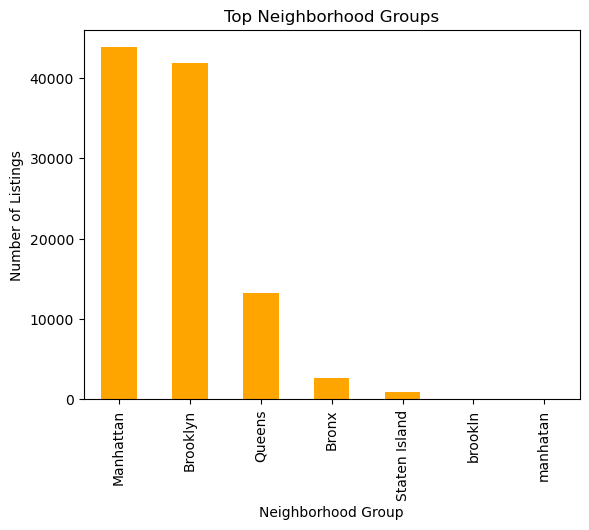

In [28]:
neigh_col = best_match(df.columns, ["neighbourhood", "neighborhood", "neighbourhood group"])
if neigh_col:
    neigh_counts = df[neigh_col].value_counts()
    print("\nQ2️⃣ Top Neighborhood Groups by Listings:")
    print(neigh_counts.head(10))

    neigh_counts.head(10).plot(kind='bar', color='orange', title='Top Neighborhood Groups')
    plt.xlabel('Neighborhood Group')
    plt.ylabel('Number of Listings')
    plt.show()

Q3: Which neighborhood groups have the highest average prices?


Q3️⃣ Average Price by Neighborhood Group:
neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.562193
Staten Island    624.490546
Manhattan        622.440227
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


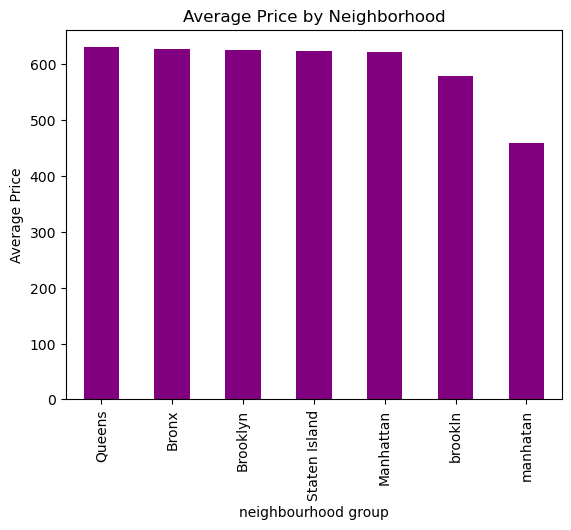

In [29]:
price_col = best_match(df.columns, ["price"])
if neigh_col and price_col:
    avg_price_neigh = df.groupby(neigh_col)[price_col].mean().sort_values(ascending=False)
    print("\nQ3️⃣ Average Price by Neighborhood Group:")
    print(avg_price_neigh.head(10))

    avg_price_neigh.head(10).plot(kind='bar', color='purple', title='Average Price by Neighborhood')
    plt.ylabel('Average Price')
    plt.show()

Q4: Relationship between construction year and price


Q4️⃣ Correlation between Construction Year and Price: -0.0038


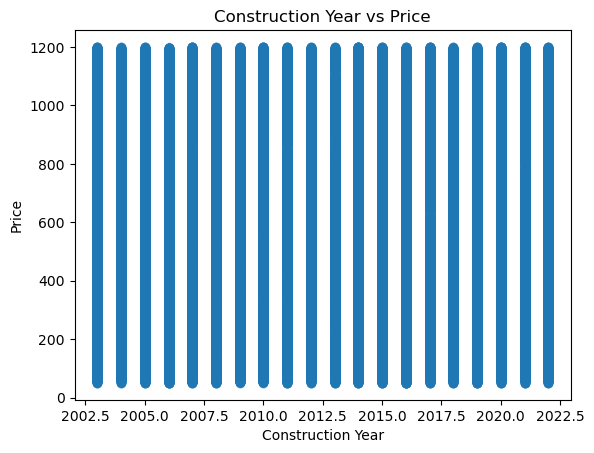

In [30]:
year_col = best_match(df.columns, ["construction", "year", "built"])
if year_col and price_col:
    tmp = df[[year_col, price_col]].dropna()
    corr = tmp[year_col].corr(tmp[price_col])
    print(f"\nQ4️⃣ Correlation between Construction Year and Price: {corr:.4f}")

    plt.scatter(tmp[year_col], tmp[price_col], alpha=0.3)
    plt.title('Construction Year vs Price')
    plt.xlabel('Construction Year')
    plt.ylabel('Price')
    plt.show()

Q5: Top 10 hosts by listing count


Q5️⃣ Top 10 Hosts by Listing Count:
host id
74086768970    2
38882689051    2
32741381728    2
27582473108    2
65331079885    2
83573592009    2
73401481508    2
52111041287    2
29104127676    2
61210811059    2
dtype: int64


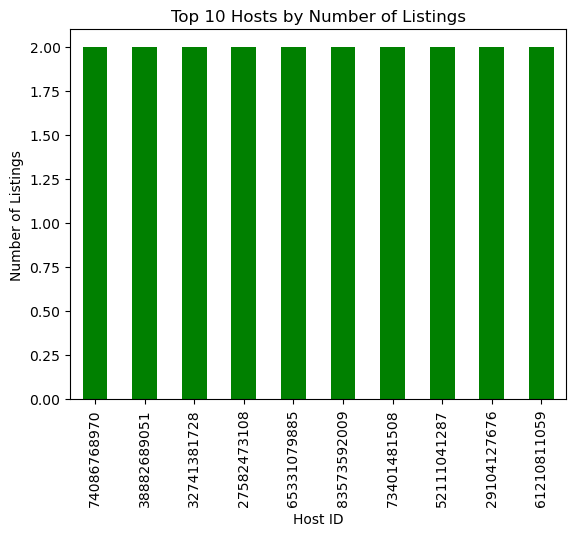

In [31]:
host_id_col = best_match(df.columns, ["host id", "host_id"])
if host_id_col:
    top_hosts = df.groupby(host_id_col).size().sort_values(ascending=False).head(10)
    print("\nQ5️⃣ Top 10 Hosts by Listing Count:")
    print(top_hosts)

    top_hosts.plot(kind='bar', color='green', title='Top 10 Hosts by Number of Listings')
    plt.xlabel('Host ID')
    plt.ylabel('Number of Listings')
    plt.show()

Q6: Verified hosts vs positive reviews

In [32]:
verified_col = best_match(df.columns, ["host_identity_verified", "verify"])
review_col = best_match(df.columns, ["review_scores_rating", "review_score", "rating"])

if verified_col and review_col:
    verified_flag = df[verified_col].astype(str).str.lower().str.contains('verified|true|yes|y', na=False)
    grp = df.groupby(verified_flag)[review_col].mean()
    print("\nQ6️⃣ Verified Host vs Average Review Score:")
    print(grp)
else:
    print("\nQ6️⃣ Review score or verified column missing — cannot compute.")


Q6️⃣ Review score or verified column missing — cannot compute.


Q7: Correlation between price and service fee


Q7️⃣ Correlation between Price and Service Fee: 0.99999


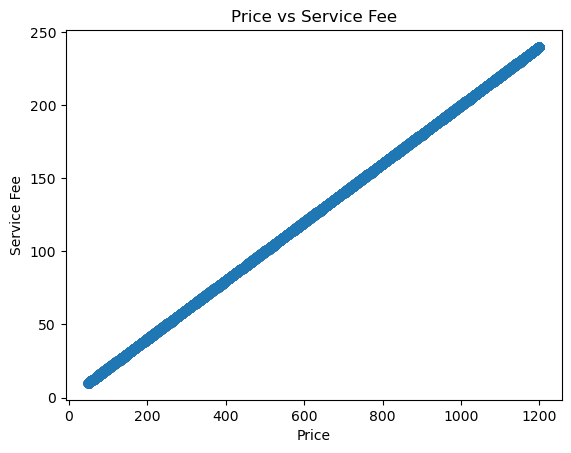

In [33]:
fee_col = best_match(df.columns, ["service", "fee", "cleaning"])
if fee_col and price_col:
    tmp2 = df[[price_col, fee_col]].dropna()
    corr_fee = tmp2[price_col].corr(tmp2[fee_col])
    print(f"\nQ7️⃣ Correlation between Price and Service Fee: {corr_fee:.5f}")

    plt.scatter(tmp2[price_col], tmp2[fee_col], alpha=0.3)
    plt.title('Price vs Service Fee')
    plt.xlabel('Price')
    plt.ylabel('Service Fee')
    plt.show()

Q8: Average review stars by neighborhood group and room type

In [34]:
if review_col and neigh_col and room_col:
    pivot_table = df.pivot_table(values=review_col, index=neigh_col, columns=room_col, aggfunc='mean')
    print("\nQ8️⃣ Average Review Scores (Pivot Table):")
    print(pivot_table.head(5))
else:
    print("\nQ8️⃣ Missing review score column — cannot create pivot table.")



Q8️⃣ Missing review score column — cannot create pivot table.


Q9: Host listing count vs availability correlation


Q9️⃣ Correlation between Host Listings Count and Availability: 0.0091


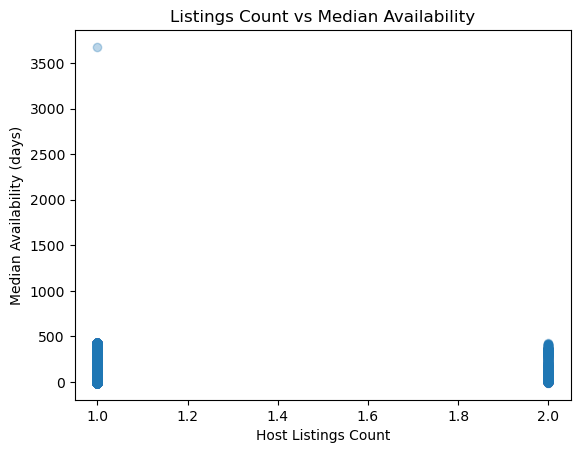

In [35]:
avail_col = best_match(df.columns, ["availability 365", "availability_365", "availability"])
if host_id_col and avail_col:
    host_summary = df.groupby(host_id_col).agg(
        listings_count=('id', 'size'),
        median_availability=(avail_col, 'median')
    ).dropna()

    corr9 = host_summary['listings_count'].corr(host_summary['median_availability'])
    print(f"\nQ9️⃣ Correlation between Host Listings Count and Availability: {corr9:.4f}")

    plt.scatter(host_summary['listings_count'], host_summary['median_availability'], alpha=0.3)
    plt.title('Listings Count vs Median Availability')
    plt.xlabel('Host Listings Count')
    plt.ylabel('Median Availability (days)')
    plt.show()